### **1. PyTorch**

- PyTorch는 **텐서(tensor)** 기반의 딥러닝 프레임워크
- PyTorch는 GPU를 통한 효율인 딥러닝 모델을 개발할 수 있음
- Colab에는 PyTorch가 이미 설치
- Colab GPU 활성화: <b>[런타임]</b> - <b>[런타임 유형 변경]</b>에서 <b>GPU 선택</b>

In [1]:
import torch

#### **GPU 사용**

* 같은 장치에 있는 텐서만이 연산 가능

In [2]:
data = [[1, 2], [3, 4]]

x = torch.tensor(data)
print(x.is_cuda)

x = x.cuda()  # GPU로 옮기기
print(x.is_cuda)

x = x.cpu()   # CPU로 옮기기
print(x.is_cuda)

False
True
False


- 서로 다른 장치에 있는 텐서의 연산은 에러 발생

In [ ]:
# GPU 및 CPU 장치에 선언된 텐서 a b
a = torch.tensor([[1, 1], [2, 2]]).cuda()
b = torch.tensor([[5, 6], [7, 8]])

#print(torch.matmul(a, b))

### **2. 텐서 생성**

#### **텐서의 속성**
- PyTorch의 텐서는 넘파이(NumPy)와 매우 유사
- PyTorch의 텐서는 **자동미분**이 가능
- 텐서 속성
  - 모양(shape)
  - 자료형(data type) - 딥러닝은 기본적은 float32 자료형을 많이 사용 
  - 저장된 장치

In [ ]:
tensor = torch.rand(3, 4)
print(tensor)

print(f"Shape: {tensor.shape}")
print(f"Data type: {tensor.dtype}")
print(f"Device: {tensor.device}")

tensor([[0.4673, 0.3665, 0.7183, 0.9225],
        [0.1034, 0.7745, 0.6268, 0.5014],
        [0.5500, 0.1713, 0.2081, 0.8354]])
Shape: torch.Size([3, 4])
Data type: torch.float32
Device: cpu


#### **텐서 생성 #1 - from List**

In [ ]:
data = [[1, 2], [3, 4]]
x = torch.tensor(data)

print(x)

tensor([[1, 2],
        [3, 4]])


#### **텐서 생성 #2 - from numpy array**

In [ ]:
a = torch.tensor([5])
b = torch.tensor([7])

c = (a + b).numpy()
print(c)
print(type(c))

result = c * 10
tensor = torch.from_numpy(result)
print(tensor)
print(type(tensor))

[12]
<class 'numpy.ndarray'>
tensor([120])
<class 'torch.Tensor'>


#### **텐서 생성 #2 - from tensor**
* <b>텐서의 속성</b>: 모양(shape), 자료형(data type)

In [ ]:
x = torch.tensor([[5, 7], [1, 2]])

# x와 같은 크기의 값이 1인 텐서 생성
x_ones = torch.ones_like(x)
print(x_ones)

# x와 같은 크기의 랜덤값으로 구성된 텐서 생성
x_rand = torch.rand_like(x, dtype=torch.float32)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.9291, 0.8967],
        [0.0519, 0.4081]])


### **3. 텐서의 형변환**

#### **인덱싱 및 슬라이싱**

In [ ]:
tensor = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(tensor[0][1].numpy())
print(tensor[0])        # first row
print(tensor[:, 0])     # first column
print(tensor[..., -1])  # last column

2
tensor([1, 2, 3, 4])
False
tensor([ 4,  8, 12])


#### **결합(Concatenate)**

In [ ]:
tensor = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# dim - 0: 행을 기준, 1: 열을 기준
result = torch.cat([tensor, tensor, tensor], dim=0)
print('result = \n', result)

result = torch.cat([tensor, tensor, tensor], dim=1)
print('result = \n', result)

result = 
 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
result = 
 tensor([[ 1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  5,  6,  7,  8,  5,  6,  7,  8],
        [ 9, 10, 11, 12,  9, 10, 11, 12,  9, 10, 11, 12]])


#### **형변환(Type Casting)**

* 텐서의 자료형: 정수(torch.int32), 실수(torch.float32)

In [ ]:
a = torch.tensor([2], dtype=torch.int)
b = torch.tensor([5.0])

print(a.dtype)
print(b.dtype)

# 텐서 a는 float32형으로 자동 형변환
print(a + b)

# 텐서 b를 int32형으로 형변환하여 덧셈 수행
print(a + b.type(torch.int32))

torch.int32
torch.float32
tensor([7.])
tensor([7], dtype=torch.int32)


#### **모양 변경**
- torch.view() vs torch.reshape()
- 위의 두 멤버함수 모두 형태를 변경하는데 사용
- view() 멤버함수는 대상 tensor가 contiguous 하지 않으면 에러를 발생

#### contiguous
- Contiguous(인접성); data들이 메모리상에서 실제로 인접해있는지를 의미
- 아래 그림에서 A와 B는 axis를 기준으로 1씩 증가 ==> 메모리상에서도 순서대로 저장 ==> "contiguous"
- transpose된 b의 메모리는 순서대로 저장되지 않으며, 이런 경우에 view함수를 사용했을 경우 에러가 발생

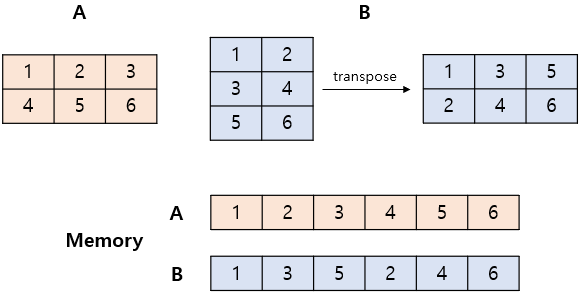

In [ ]:
# view() 및 reshpae() 함수를 통한 텐서의 모양 변경
a = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])
b = a.view(4, 2)
c = a.reshape(4, 2)
print(b)
print(c)

# a의 값을 변경하면 b도 변경
a[1] = 0
print(b)

# a의 값을 복사(copy)한 뒤에 변경
b = a.clone().view(4, 2)
a[0] = 100
print(b)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 0],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 0],
        [3, 4],
        [5, 6],
        [7, 8]])


#### **차원 교환**

In [ ]:
a = torch.rand((64, 32, 3))
print(a.shape)

# 차원 자체를 교환, (2번째 축, 1번째 축, 0번째 축)의 형태
b = a.permute(2, 1, 0)
print(b.shape)

torch.Size([64, 32, 3])
torch.Size([3, 32, 64])


### <b>4. 텐서의 연산과 함수</b>

#### **사칙연산**

In [ ]:
# Element-wise 사칙연산
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

print(a + b)
print(a - b)
print(a * b)
print(a / b)


# Matrix multiplication
print(a.matmul(b))
print(torch.matmul(a, b))

tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


#### **평균(mean)**

In [ ]:
a = torch.Tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(a)
print(a.mean())       # 전체 원소에 대한 평균
print(a.mean(dim=0))  # 각 열에 대하여 평균 계산
print(a.mean(dim=1))  # 각 행에 대하여 평균 계산

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
tensor(4.5000)
tensor([3., 4., 5., 6.])
tensor([2.5000, 6.5000])


#### **합(sum)**

In [3]:
a = torch.Tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(a)
print(a.sum())      # 전체 원소에 대한 합계
print(a.sum(dim=0)) # 각 열에 대하여 합계 계산
print(a.sum(dim=1)) # 각 행에 대하여 합계 계산

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
tensor(36.)
tensor([ 6.,  8., 10., 12.])
tensor([10., 26.])


#### **최대(max, argmax)**

In [9]:
a = torch.Tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(a)
print(a.max())          # 전체 원소에 대한 최댓값
print(a.max(dim=0))     # 각 열에 대하여 최댓값 계산
print(a.max(dim=1))     # 각 행에 대하여 최댓값 계산

a1, a2 = a.max(dim=0)
print(a1.numpy())
print(a2.numpy())

print(a)
print(a.argmax())       # 전체 원소에 대한 최댓값의 인덱스
print(a.argmax(dim=0))  # 각 열에 대하여 최댓값의 인덱스 계산
print(a.argmax(dim=1))  # 각 행에 대하여 최댓값의 인덱스 계산

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
tensor(8.)
torch.return_types.max(
values=tensor([5., 6., 7., 8.]),
indices=tensor([1, 1, 1, 1]))
torch.return_types.max(
values=tensor([4., 8.]),
indices=tensor([3, 3]))
[5. 6. 7. 8.]
[1 1 1 1]
tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
tensor(7)
tensor([1, 1, 1, 1])
tensor([3, 3])


#### **차원 줄이기 혹은 늘리기**

- <b>unsqueeze() 함수</b>는  크기가 1인 차원을 추가
  - 배치(batch) 차원을 추가하기 위한 목적으로 흔히 사용
- <b>squeeze() 함수</b>는 크기가 1인 차원을 제거

In [10]:
a = torch.Tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(a.shape)

# 첫 번째 축에 차원 추가
a = a.unsqueeze(0)
print(a)
print(a.shape)

# 네 번째 축에 차원 추가
a = a.unsqueeze(3)
print(a)
print(a.shape)

# 크기가 1인 차원 제거
a = a.squeeze()
print(a)
print(a.shape)

torch.Size([2, 4])
tensor([[[1., 2., 3., 4.],
         [5., 6., 7., 8.]]])
torch.Size([1, 2, 4])
tensor([[[[1.],
          [2.],
          [3.],
          [4.]],

         [[5.],
          [6.],
          [7.],
          [8.]]]])
torch.Size([1, 2, 4, 1])
tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
torch.Size([2, 4])


### **5. 자동미분과 기울기(Gradient)**

In [14]:
import torch

# requires_grad를 사용하면 기울기 추적
x = torch.tensor([3.0, 4.0], requires_grad=True)
y = torch.tensor([1.0, 2.0], requires_grad=True)

z = x + y
print(z)            # [4.0, 6.0]
print(z.grad_fn)    # 더하기(add)

out = z.mean()
print(out)          # 5.0
print(out.grad_fn)  # 평균(mean)

out.backward()      # scalar에 대하여 가능
print(x.grad)
print(y.grad)

tensor([4., 6.], grad_fn=<AddBackward0>)
tensor(5., grad_fn=<MeanBackward0>)
tensor([0.5000, 0.5000])
tensor([0.5000, 0.5000])


- 학습된 모델을 사용하여 추론을 진행할때는 기울기 추적이 필요 없음

In [ ]:
temp = torch.tensor([3.0, 4.0], requires_grad=True)
print(temp.requires_grad)
print((temp ** 2).requires_grad)

# 기울기 추적이 없음; 계산속도가 빠름
with torch.no_grad():
    temp = torch.tensor([3.0, 4.0], requires_grad=True)
    print(temp.requires_grad)
    print((temp ** 2).requires_grad)

True
True
True
False
